In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import re

In [2]:
csv_path= Path('scopus_merged_2016-2026_merged.csv')
df = pd.read_csv(csv_path)

In [3]:
if 'Domain' not in df.columns:
    domain_keywords = {
        'Software Engineering': ['software', 'program', 'programming',
                                 'coder', 'coding', 'debug', 'code review'],
        'Driving / Automotive': ['driver', 'driving', 'vehicle',
                                 'car', 'road', 'traffic'],
        'Movies / Media'     : ['movie', 'film', 'screen',
                                 'cinema', 'watching video', 'tv'],
        'Gaming / VR'        : ['game', 'gaming', 'video game',
                                 'vr', 'virtual reality'],
        'Education / Learning': ['student', 'learning', 'reading',
                                 'teaching', 'classroom', 'education'],
        'Medical'            : ['surgery', 'patient', 'medical',
                                 'diagnosis', 'surgical']
    }
    def classify(row):
        txt = f"{row['Title']} {row.get('Abstract','')}".lower()
        for dom, kws in domain_keywords.items():
            if any(kw in txt for kw in kws):
                return dom
        return 'Other'
    df['Domain'] = df.apply(classify, axis=1)

In [4]:
# ── 3.  filter for the “Other” slice ──────────────────────────────────────
other_df = df[df['Domain'] == 'Other']

In [5]:
# ── 4.  extract & count keywords ─────────────────────────────────────────
def split_kws(text):
    if pd.isna(text):
        return []
    # split on semicolon, comma, or pipe
    parts = re.split(r'[;,|]', str(text))
    return [p.strip().lower() for p in parts if p.strip()]

keywords = []
for _, row in other_df.iterrows():
    keywords += split_kws(row.get('Author Keywords', ''))
    keywords += split_kws(row.get('Index Keywords', ''))

top_kws = Counter(keywords).most_common(30)
kw_df   = pd.DataFrame(top_kws, columns=['Keyword', 'Frequency'])


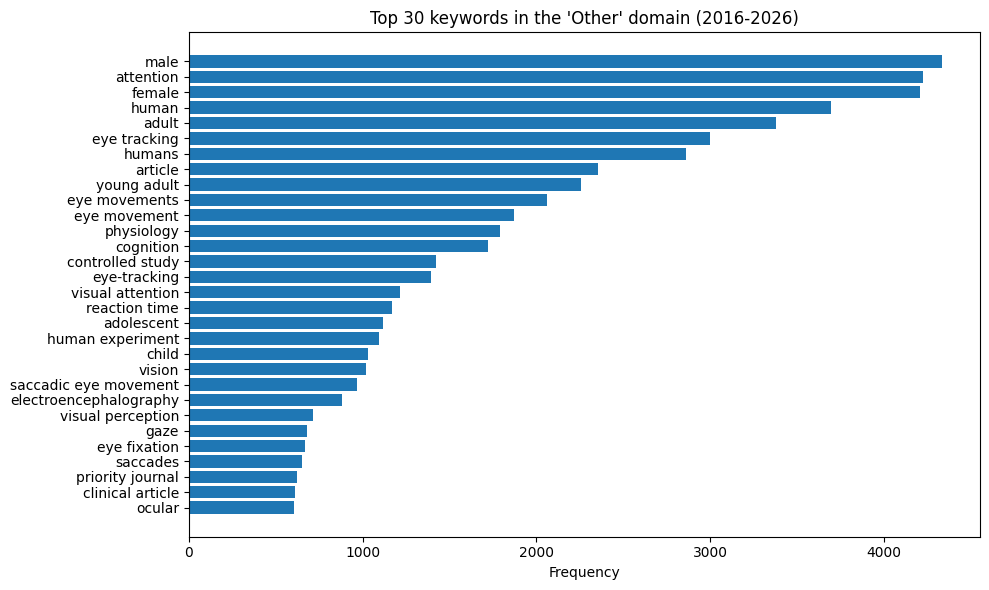

In [6]:
# ── 5.  plot ----------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.barh(kw_df['Keyword'][::-1], kw_df['Frequency'][::-1])
plt.title("Top 30 keywords in the 'Other' domain (2016-2026)")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()